In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# <h1><center>Le terapie e la mastectomia influiscono sulla mortalità?</center></h1>

<h3><center>1. Info preliminari</center></h3>
</br>Il dataset utilizzato proviene dal database Molecular Taxonomy of Breast Cancer International Consortium (METABRIC), un progetto Canada-Regno Unito che contiene dati di sequenziamento mirato di 1.980 campioni primari di cancro al seno. I dati clinici e genomici sono stati scaricati da cBioPortal.
Il set di dati è stato raccolto dal professor Carlos Caldas del Cambridge Research Institute e dal professor Sam Aparicio del British Columbia Cancer Centre in Canada e pubblicato su Nature Communications (Pereira et al., 2016). È stato anche presentato in diversi articoli.

<h5><center>Ringraziamenti</center></h5>
Set di dati sul cancro al seno (METABRIC, Nature 2012 e Nat Commun 2016) in CBioPortal</br>
Studio METABRIC</br>
Cerami et al. The cBio Cancer Genomics Portal: una piattaforma aperta per esplorare dati di genomica del cancro multidimensionale. Cancer Discovery. Maggio 2012 2.</br>
Gao et al. Analisi integrativa di profili clinici e genomica del cancro complessi utilizzando cBioPortal. Sci. Signal. 6, pl1 (2013).

<h5><center>Caratteristiche dataset</center></h5>
<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>patient_id</td><td>object</td><td>ID Paziente</td>
        </tr>
        <tr>
            <td>age_at_diagnosis</td><td>float</td><td>Età del paziente al momento della diagnosi</td>
        </tr>
        <tr>
            <td>type_of_breast_surgery</td><td>object</td><td>Tipo di intervento chirurgico per il cancro al seno: 
1- MASTECTOMY, che si riferisce a un intervento chirurgico per rimuovere tutto il tessuto mammario da un seno come un modo per trattare o prevenire il cancro al seno. 
2- BREAST CONSERVING, che si riferisce a un intervento chirurgico in cui viene rimossa solo la parte del seno che ha il cancro</td>
        </tr>
        <tr>
            <td>cancer_type</td><td>object</td><td>Tipi di cancro al seno: 1- Breast Cancer o 2- Breast Sarcoma</td>
        </tr>
        <tr>
            <td>cancer_type_detailed</td><td>object</td><td>Tipi dettagliati di cancro al seno: 
1- Breast Invasive Ductal Carcinoma 
2- Breast Mixed Ductal and Lobular Carcinoma 
3- Breast Invasive Lobular Carcinoma 
4- Breast Invasive Mixed Mucinous Carcinoma 
5- Metaplastic Breast Cancer</td>
        </tr>
        <tr>
            <td>cellularity</td><td>object</td><td>Cellularità del cancro dopo chemioterapia, che si riferisce alla quantità di cellule tumorali nel campione e alla loro disposizione in cluster</td>
        </tr>
    </table>
</body>

<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>chemotherapy</td><td>int</td><td>Se il paziente ha ricevuto o meno la chemioterapia come trattamento (sì/no)</td>
        </tr>
        <tr>
            <td>pam50_+_claudin-low_subtype</td><td>object</td><td>Pam 50: è un test di profilazione tumorale che aiuta a mostrare se alcuni tumori al seno positivi al recettore degli estrogeni (ER-positivi) e HER2-negativi hanno probabilità di metastatizzare (quando il tumore al seno si diffonde ad altri organi). Il sottotipo di tumore al seno con bassi livelli di claudina è definito dalle caratteristiche di espressione genica, in particolare: bassa espressione dei geni di adesione cellula-cellula, alta espressione dei geni di transizione epiteliale-mesenchimale (EMT) e modelli di espressione genica simili alle cellule staminali/meno differenziati.</td>
        </tr>
        <tr>
            <td>cohort</td><td>float</td><td>La coorte è un gruppo di soggetti che condividono una caratteristica definitoria (assume un valore da 1 a 5)</td>
        </tr>
        <tr>
            <td>er_status_measured_by_ihc</td><td>float</td><td>Per valutare se i recettori degli estrogeni sono espressi sulle cellule cancerose utilizzando l'immunoistochimica (un colorante utilizzato in patologia che prende di mira un antigene specifico, se è presente, darà un colore, se non è presente, il tessuto sul vetrino sarà colorato) (positivo/negativo)</td>
        </tr>
        <tr>
            <td>er_status</td><td>object</td><td>Le cellule cancerose sono positive o negative per i recettori degli estrogeni</td>
        </tr>
        <tr>
            <td>neoplasm_histologic_grade</td><td>int</td><td>Determinato dalla patologia osservando la natura delle cellule, sembrano aggressive o meno (prende un valore da 1 a 3)</td>
        </tr>
    </table>
</body>

<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>her2_status_measured_by_snp6</td><td>object</td><td>Per valutare se il cancro è positivo o meno per HER2 utilizzando tecniche molecolari avanzate (tipo di sequenziamento di nuova generazione)</td>
        </tr>
        <tr>
            <td>her2_status</td><td>object</td><td>Se il cancro è positivo o negativo per HER2</td>
        </tr>
        <tr>
            <td>tumor_other_histologic_subtype</td><td>object</td><td>Tipo di cancro in base all'esame microscopico del tessuto canceroso (si assume un valore di 'Duttale/NST', 'Misto', 'Lobulare', 'Tubolare/cribriforme', 'Mucinoso', 'Midollare', 'Altro', 'Metaplastico')</td>
        </tr>
        <tr>
            <td>hormone_therapy</td><td>int</td><td>Se il paziente ha ricevuto o meno un trattamento ormonale (sì/no)</td>
        </tr>
        <tr>
            <td>inferred_menopausal_state</td><td>object</td><td>Se il paziente è in post-menopausa o meno (post/pre)</td>
        </tr>
        <tr>
            <td>integrative_cluster</td><td>object</td><td>Sottotipo molecolare del cancro basato su una certa espressione genica (prende un valore da '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')</td>
        </tr>
    </table>
</body>

<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>primary_tumor_laterality</td><td>object</td><td>Che si tratti del seno destro o del seno sinistro</td>
        </tr>
        <tr>
            <td>lymph_nodes_examined_positive</td><td>float</td><td>Per prelevare campioni del linfonodo durante l'intervento e vedere se sono stati coinvolti dal cancro</td>
        </tr>
        <tr>
            <td>mutation_count</td><td>float</td><td>Numero di geni che presentano mutazioni rilevanti</td>
        </tr>
        <tr>
            <td>nottingham_prognostic_index</td><td>float</td><td>Viene utilizzato per determinare la prognosi dopo un intervento chirurgico per il cancro al seno. Il suo valore viene calcolato utilizzando tre criteri patologici: la dimensione del tumore; il numero di linfonodi coinvolti; e il grado del tumore.</td>
        </tr>
        <tr>
            <td>oncotree_code</td><td>object</td><td>OncoTree è un'ontologia open source sviluppata presso il Memorial Sloan Kettering Cancer Center (MSK) per standardizzare la diagnosi del tipo di cancro da una prospettiva clinica, assegnando a ciascuna diagnosi un codice OncoTree univoco.</td>
        </tr>
        <tr>
            <td>overall_survival_months</td><td>float</td><td>Durata dal momento dell'intervento fino alla morte</td>
        </tr>
    </table>
</body>

<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>overall_survival</td><td>object</td><td>Variabile target: il paziente è vivo o morto.</td>
        </tr>
        <tr>
            <td>pr_status</td><td>object</td><td>Le cellule tumorali sono positive o negative per i recettori del progesterone</td>
        </tr>
        <tr>
            <td>radio_therapy</td><td>int</td><td>Se il paziente ha ricevuto o meno la radioterapia come trattamento (sì/no)</td>
        </tr>
        <tr>
            <td>3-gene_classifier_subtype</td><td>object</td><td>Sottotipo di classificatore di tre geni. Accetta un valore da 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif', 'HER2+'</td>
        </tr>
        <tr>
            <td>tumor_size</td><td>float</td><td>Dimensioni del tumore misurate mediante tecniche di imaging</td>
        </tr>
        <tr>
            <td>tumor_stage</td><td>float</td><td>Stadio del cancro in base al coinvolgimento delle strutture circostanti, dei linfonodi e della diffusione a distanza</td>
        </tr>
        <tr>
            <td>death_from_cancer</td><td>int</td><td>Se la morte del paziente è stata dovuta o meno al cancro (sì/no)</td>
        </tr>
    </table>
</body>

Più altre 506 colonne di parte genetica del set di dati contenente livelli di m-RNA:
1. punteggio z per 331 geni
2. mutazione per 175 geni

<b>Formula:</b></br>

<b>z</b> = $
\frac{\text{(espressione nel campione tumorale)} - \text{(espressione media nel campione di riferimento)}} {\text{deviazione standard dell'espressione nel campione di riferimento}}
$

<h3><center>2. Motivazione</center></h3>

1. Passione

2. Essere utile

3. Possibilità di crescita

<h5><center><b>Le domande</b></center></h5>
<b>Premessa</b></br>
Non essendo esperto di dominio, ho preso in considerazione solo alcune colonne del dataset.</br>
Mi sono concentrato su qualcosa di semplice e diretto.</br>
Ho effettuato modifiche su come visualizzare i dati necessari.

<h3><center><b>Qual è il quadro generale?</b></center></h3>
Una domanda semplice, ma che si focalizza nel far <b>osservare</b> ciò che si vede e che non si nota.
</br></br>
<p>Il cancro al seno è il tumore più frequente tra le donne, che colpisce <b>2,1 milioni di donne ogni anno</b>, causando il maggior numero di decessi correlati al cancro tra le donne. Solo nel 2018, si stima che <b>627.000</b> donne siano morte di cancro al seno.</p>

<h5><center><b>Analisi preliminare del dataset:</b></center></h5>
<body>
    <table border="1">
        <tr>
            <td><b>Stadio tumore</b></td><td><b>Percentuale</b></td>
        </tr>
        <tr>
            <td>0</td><td>0,28%</td>
        </tr>
        <tr>
            <td>1</td><td>33.86%</td>
        </tr>
        <tr>
            <td>2</td><td>57.02%</td>
        </tr>
        <tr>
            <td>3</td><td>8.20%</td>
        </tr>
        <tr>
            <td>4</td><td>0.64%</td>
        </tr>
    </table>
</body>

<b>Nota positiva:</b> c'è chi sconfigge il cancro in 35 giorni.

<b>Nota negativa:</b> c'è chi deve combatterlo fino alla morte, che può durare anche <b>28 anni</b>.

In [2]:
lista_terapie = []

for nome_file in os.listdir('Terapie'):
    percorso_file = os.path.join('Terapie', nome_file)
    df = pd.read_pickle(percorso_file)
    df = df.reset_index(drop=True)
    lista_terapie.append(df)

In [3]:
df_età = lista_terapie[7].copy()
lista_terapie.pop(7)

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,tumor_stage,type_of_breast_surgery,COR_Terapie,Terapie
0,75.65,140.50,Living,22.0,2.0,MASTECTOMY,"(0, 1, 1)",radio + ormone
1,43.19,84.63,Living,10.0,1.0,BREAST CONSERVING,"(0, 1, 1)",radio + ormone
2,48.87,163.70,Died of Disease,15.0,2.0,MASTECTOMY,"(1, 1, 0)",chemio + ormone
3,47.68,164.93,Living,25.0,2.0,MASTECTOMY,"(1, 1, 1)",tutte
4,76.97,41.37,Died of Disease,40.0,2.0,MASTECTOMY,"(1, 1, 1)",tutte
...,...,...,...,...,...,...,...,...
1076,75.33,0.10,Died of Disease,15.0,1.0,MASTECTOMY,"(0, 0, 0)",nessuna
1077,70.65,201.17,Living,20.0,1.0,BREAST CONSERVING,"(0, 0, 1)",radio
1078,52.84,200.33,Living,20.0,2.0,BREAST CONSERVING,"(1, 0, 1)",chemio + radio
1079,48.59,14.70,Died of Disease,30.0,2.0,MASTECTOMY,"(1, 0, 1)",chemio + radio


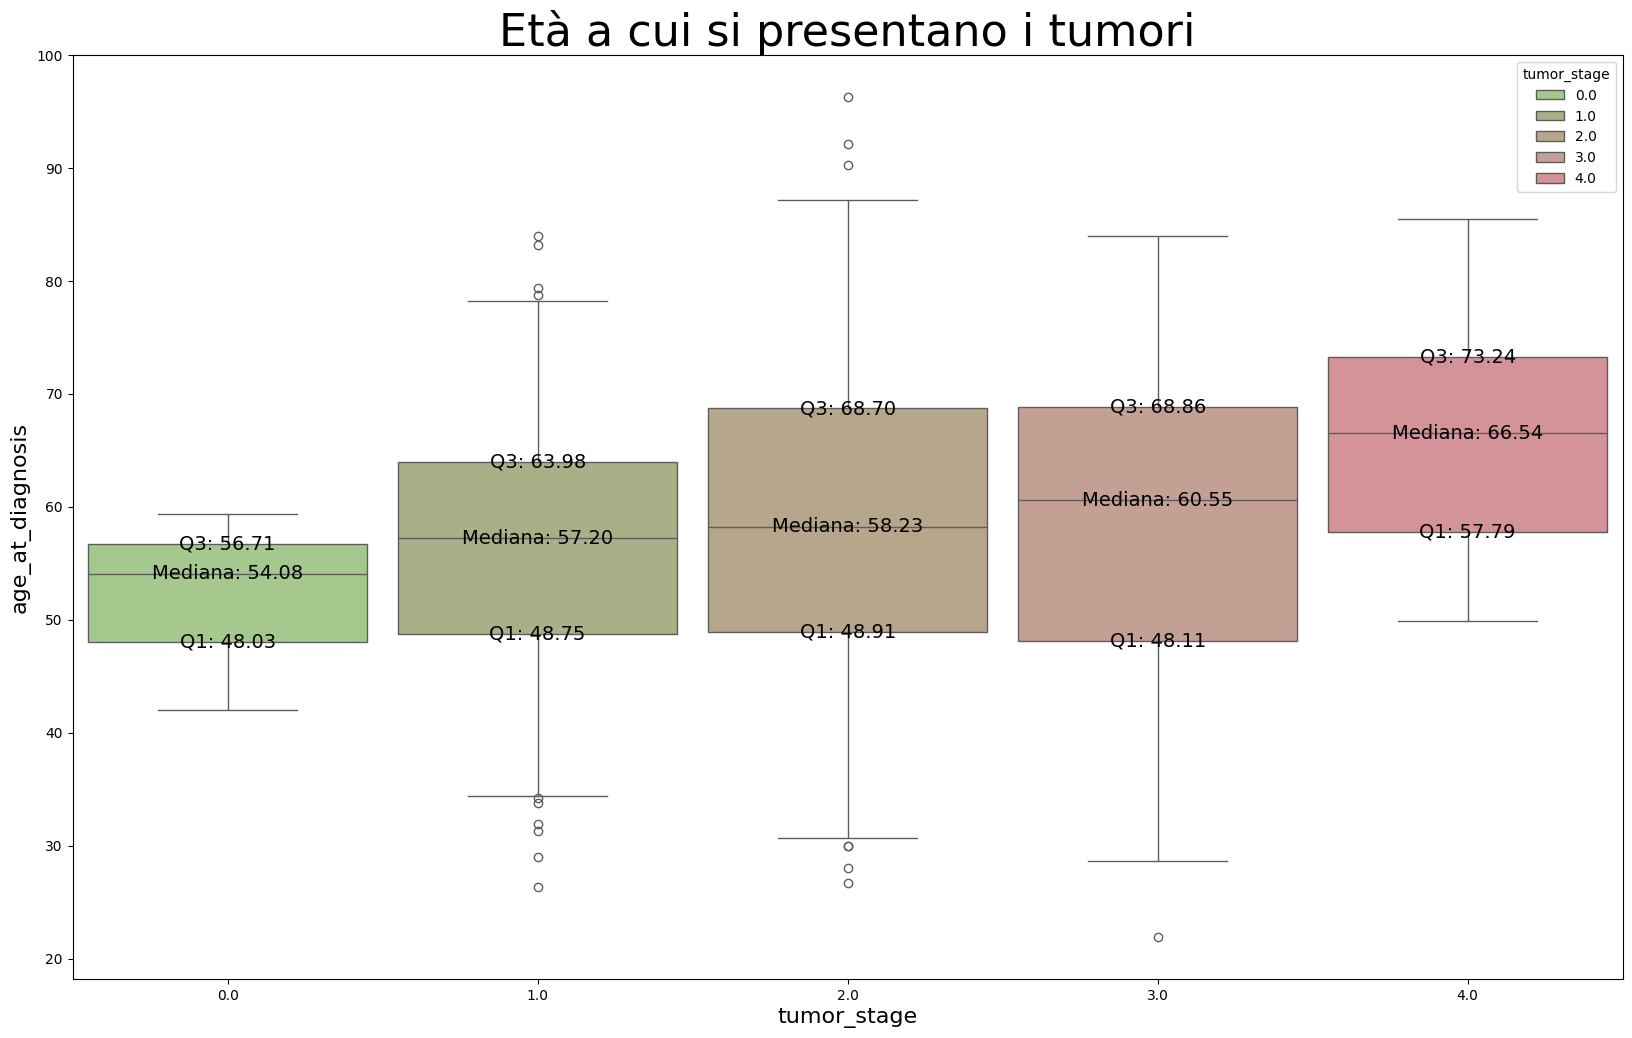

In [4]:
# Fare boxplot su df_età prendendo lo stadio tumorale e l'età
color = ['#9de66f', '#b8c275', '#c9ab78', '#db937c', '#f27480']

quartiles = df_età.groupby("tumor_stage")["age_at_diagnosis"].describe()[["25%", "50%", "75%"]]

plt.figure(figsize=(20, 12))
b = sns.boxplot(data=df_età, x='tumor_stage', y='age_at_diagnosis', hue='tumor_stage', palette=color,
                saturation=0.5, width=1, gap=.1, whis=0.95)
plt.title(f'Età a cui si presentano i tumori', fontsize=32)
b.set_xlabel('tumor_stage', fontsize=16)
b.set_ylabel('age_at_diagnosis', fontsize=16)

for i, tumor_stage in enumerate(quartiles.index):
    q1 = quartiles.loc[tumor_stage, "25%"]
    median = quartiles.loc[tumor_stage, "50%"]
    q3 = quartiles.loc[tumor_stage, "75%"]

    
    b.text(i, q1, f"Q1: {q1:.2f}", ha="center", va="center", fontsize=14)
    b.text(i, median, f"Mediana: {median:.2f}", ha="center", va="center", fontsize=14)
    b.text(i, q3, f"Q3: {q3:.2f}", ha="center", va="center", fontsize=14)

plt.show()

In [5]:
df_nuovo = lista_terapie[7].copy()
lista_terapie.pop(8)

,Cura,Media,Minimo,Massimo,Mediana
0,radio + ormone,148.45,2.00,318.20,144.44
1,radio,202.80,34.10,307.93,200.88
2,tutte,130.00,13.40,259.93,130.99
3,chemio,175.49,25.03,278.27,180.06
4,nessuna,190.01,1.23,337.03,205.73
5,ormone,159.26,1.27,300.87,163.40
6,chemio + radio,173.68,10.83,322.83,186.90
7,chemio + ormone,133.72,72.67,194.20,140.55


In [6]:
df_statistiche = lista_terapie[7].copy()
lista_terapie.pop(7)

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
0,56.79,44.83,Died of Disease,16.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 1.0
1,76.06,198.30,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
2,60.96,14.17,Died of Disease,18.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
3,61.78,163.73,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
4,55.53,190.17,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
...,...,...,...,...,...,...,...
1060,57.79,9.07,Died of Disease,48.0,"(1, 1, 1)",tutte,MASTECTOMY 4.0
1061,78.77,7.80,Died of Disease,31.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 4.0
1062,73.24,89.90,Died of Disease,67.0,"(0, 0, 0)",nessuna,MASTECTOMY 4.0
1063,67.46,48.53,Died of Disease,25.0,"(1, 1, 0)",chemio + ormone,MASTECTOMY 4.0


In [7]:
def crea_grafico(tasso_sopravvivenza, titolo, n, m):
    terapia = tasso_sopravvivenza['Terapia']
    vivi = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[0])
    morti = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[1])
    
    plt.figure(figsize=(40, 24), dpi=100)

    x_pos = np.arange(len(terapia))
    
    plt.bar(x_pos - 0.1, vivi, width=0.1, color='#9de66f', label='Percentuale pazienti vivi')
    plt.bar(x_pos + 0.1, morti, width=0.1, color='#f27480', label='Percentuale pazienti morti')
    
    for i in range(len(terapia)):
        plt.text(x_pos[i] - 0.1, vivi[i], f'{vivi[i]}%\ncount: {n[i]}', ha='center', va='bottom', fontweight='bold', fontsize=24)
        plt.text(x_pos[i] + 0.1, morti[i] + 1, f'{morti[i]}%\ncount: {m[i]}', ha='center', va='bottom', fontweight='bold', fontsize=24)
    
    plt.xticks(x_pos, terapia, fontsize=24)
    plt.legend(fontsize=24)
    plt.title(titolo, fontsize=48)

<h3><center><b>L'età influisce sulla possibilità di sopravvivenza?</b></center></h3>

Grafico di densità




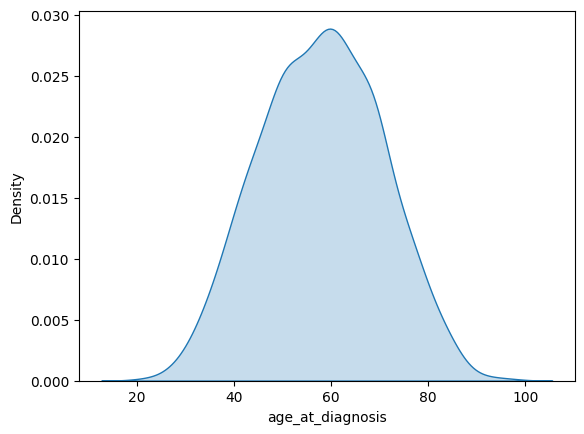

L'età media dei pazienti affetti da cancro al seno è di: 57.9 anni


In [8]:
print('Grafico di densità')
print('\n')
sns.kdeplot(df_nuovo, x=df_nuovo.columns[0], fill=True)
plt.show()
media = (df_nuovo['age_at_diagnosis'].mean()).round(2)
print(f'L\'età media dei pazienti affetti da cancro al seno è di: {media} anni')

Nel dettaglio, possiamo differenziare i pazienti tra vivi e deceduti.

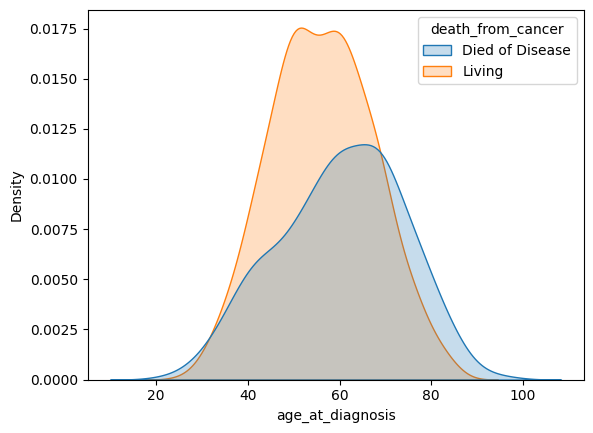

In [9]:
sns.kdeplot(df_nuovo, x=df_nuovo.columns[0], hue="death_from_cancer", fill=True)
plt.show()

Da questo grafico si evince che l'età non influisce così tanto, in quanto ci sono pazienti deceduti anche intorno ai 20 anni.</br>
La buona notizia è che, grazie al progresso scientifico, c'è un tasso maggiore di pazienti vivi

Entriamo ora nel nocciolo dello studio</br>
<center><b>Le terapie e la mastectomia influiscono sulla mortalità?</b></center>

Partiamo prima con l'intervento di rimozione del seno

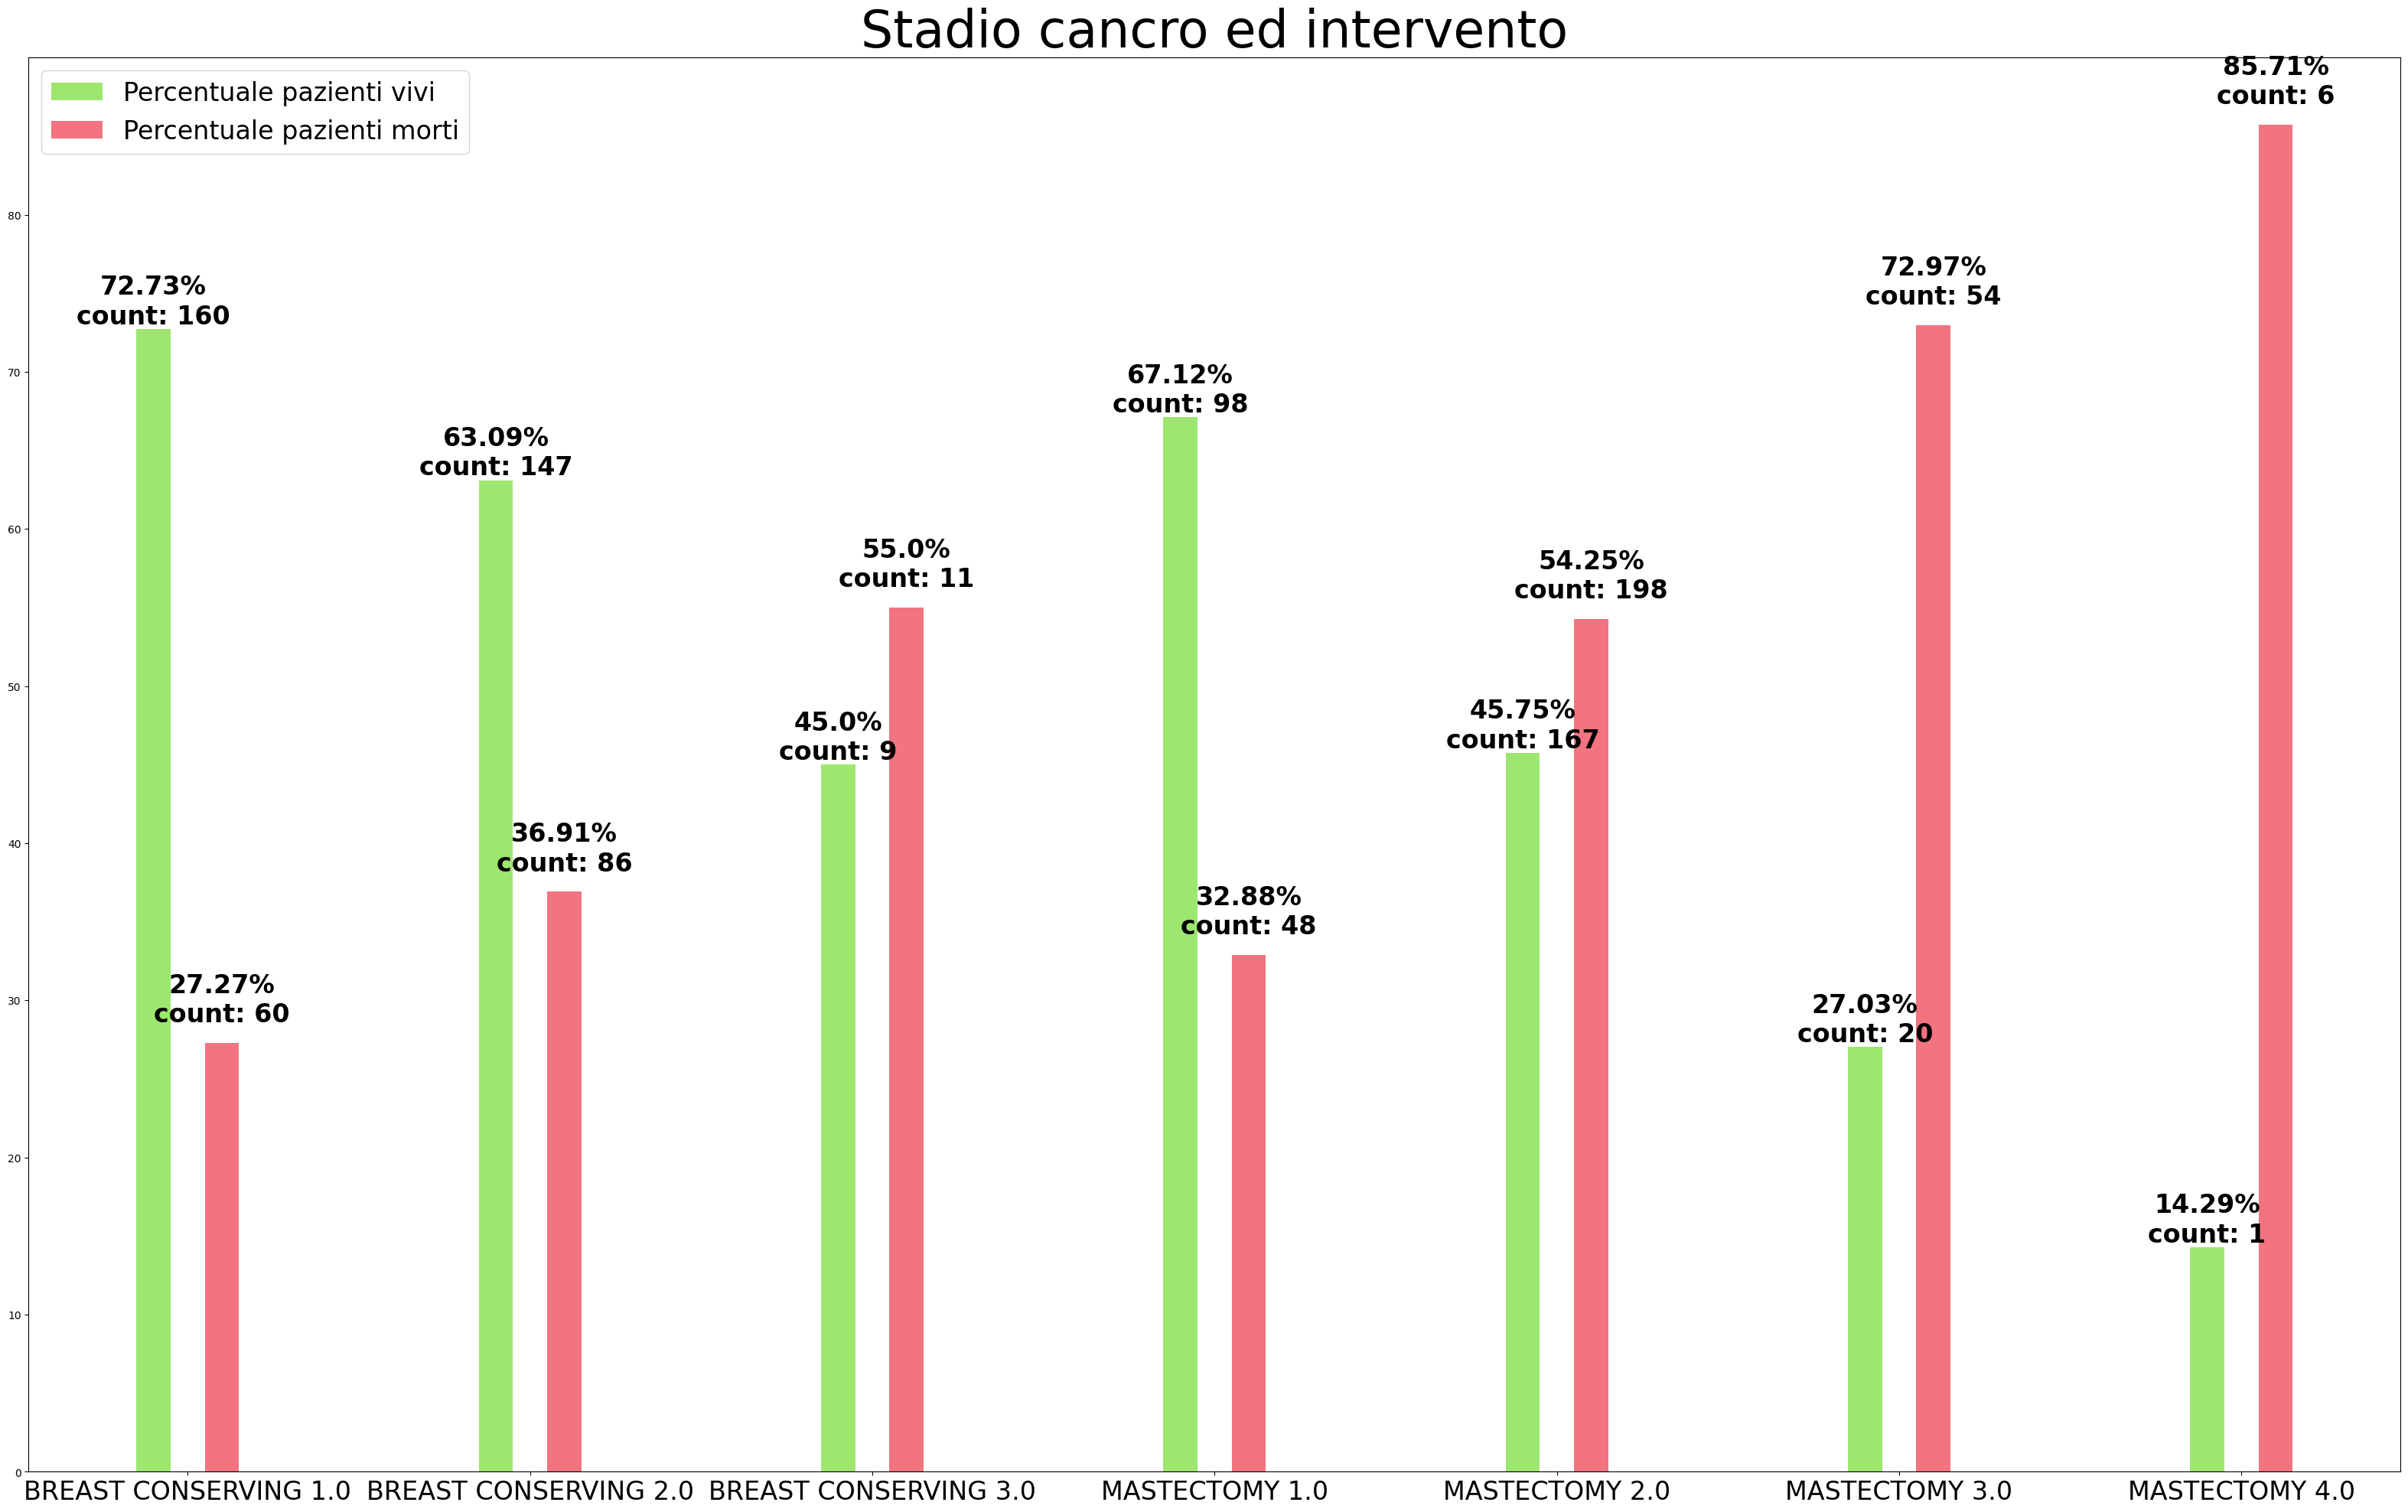

In [10]:
tasso_mortalità = []
n = []
m = []

for titolo, dataset in zip(os.listdir('Terapie'), lista_terapie):
    y = titolo[2:-4]
    value_counts = (dataset['death_from_cancer'].value_counts())
    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    totale = value_counts.sum()
    percentuale = ((value_counts / totale) * 100).round(2)
    
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)
    tasso_mortalità.append((y, tupla))
    n.append(conto_n)
    m.append(conto_m)
    
tasso_sopravvivenza = pd.DataFrame(tasso_mortalità, columns=['Terapia', 'Percentuale(v/m)'])
crea_grafico(tasso_sopravvivenza, "Stadio cancro ed intervento", n, m)

A parità di stadio tumorale, sembra che la mastectomia influisca sul tasso di sopravvivenza del paziente, ma...

...esistono anche varie cure.

Il dataset presenta 3 tipi di cure:
1. chemio terapia
2. ormone terapia
3. radio terapia

Entrando nel dettaglio, possiamo vedere quanto le cure influiscano sui vari casi (Stadio Tumore x Operazione chirurgica)

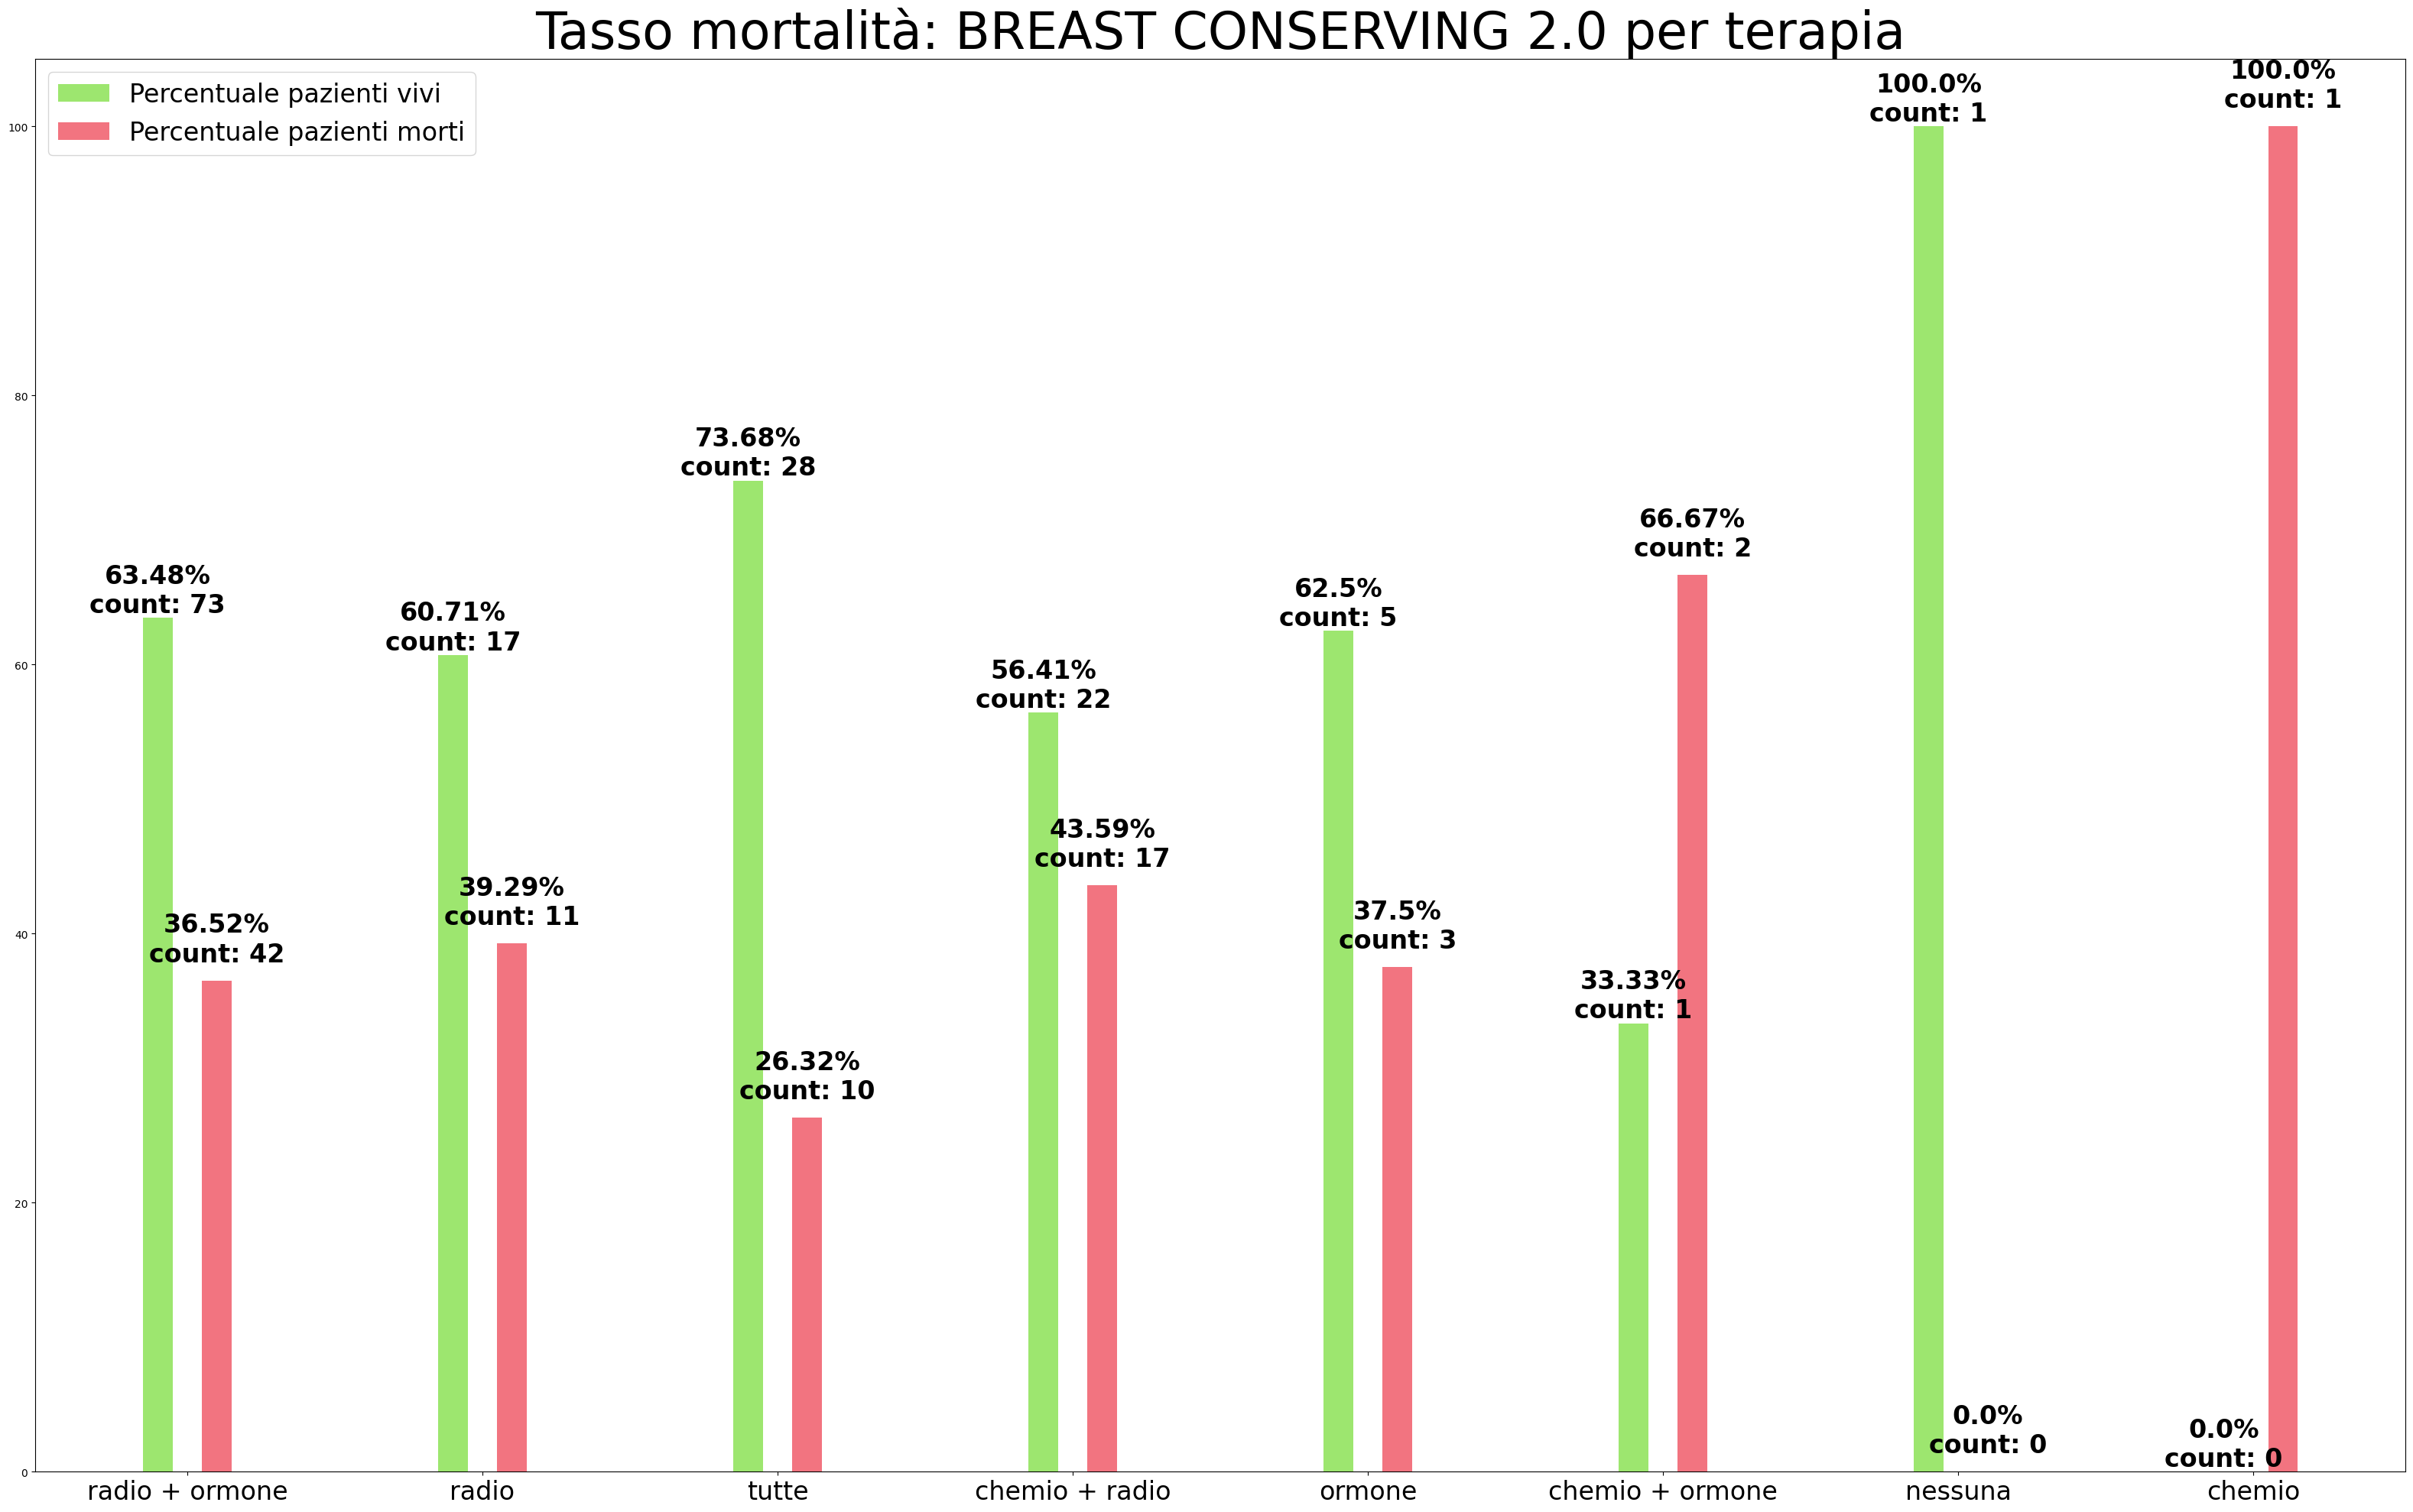

In [11]:
risultati = []

dataset = lista_terapie[1]
data = []
n = []
m = []

for terapia in dataset['Terapie'].unique():
    df_terapia = dataset[dataset['Terapie'] == terapia]
    
    value_counts = df_terapia['death_from_cancer'].value_counts()

    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    
    totale = value_counts.sum()
    
    percentuale = ((value_counts / totale) * 100).round(2)
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)

    # Mi servirà dopo per calcolarmi con che probabilità si verifica un evento
    conteggio = (conto_n + conto_m)

    # Inserisco anche 'dataset['Operation_Stage'].iloc[0]' per facilitarmi dopo il multi index in quanto andrò a fare le percentuali assolute
    risultati.append((dataset['Operation_Stage'].iloc[0], terapia, tupla, conteggio))

    data.append({'Terapia': terapia, 'Percentuale(v/m)': tupla})
    n.append(conto_n)
    m.append(conto_m)

grafico = pd.DataFrame(data)
crea_grafico(grafico, f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]} per terapia', n, m)

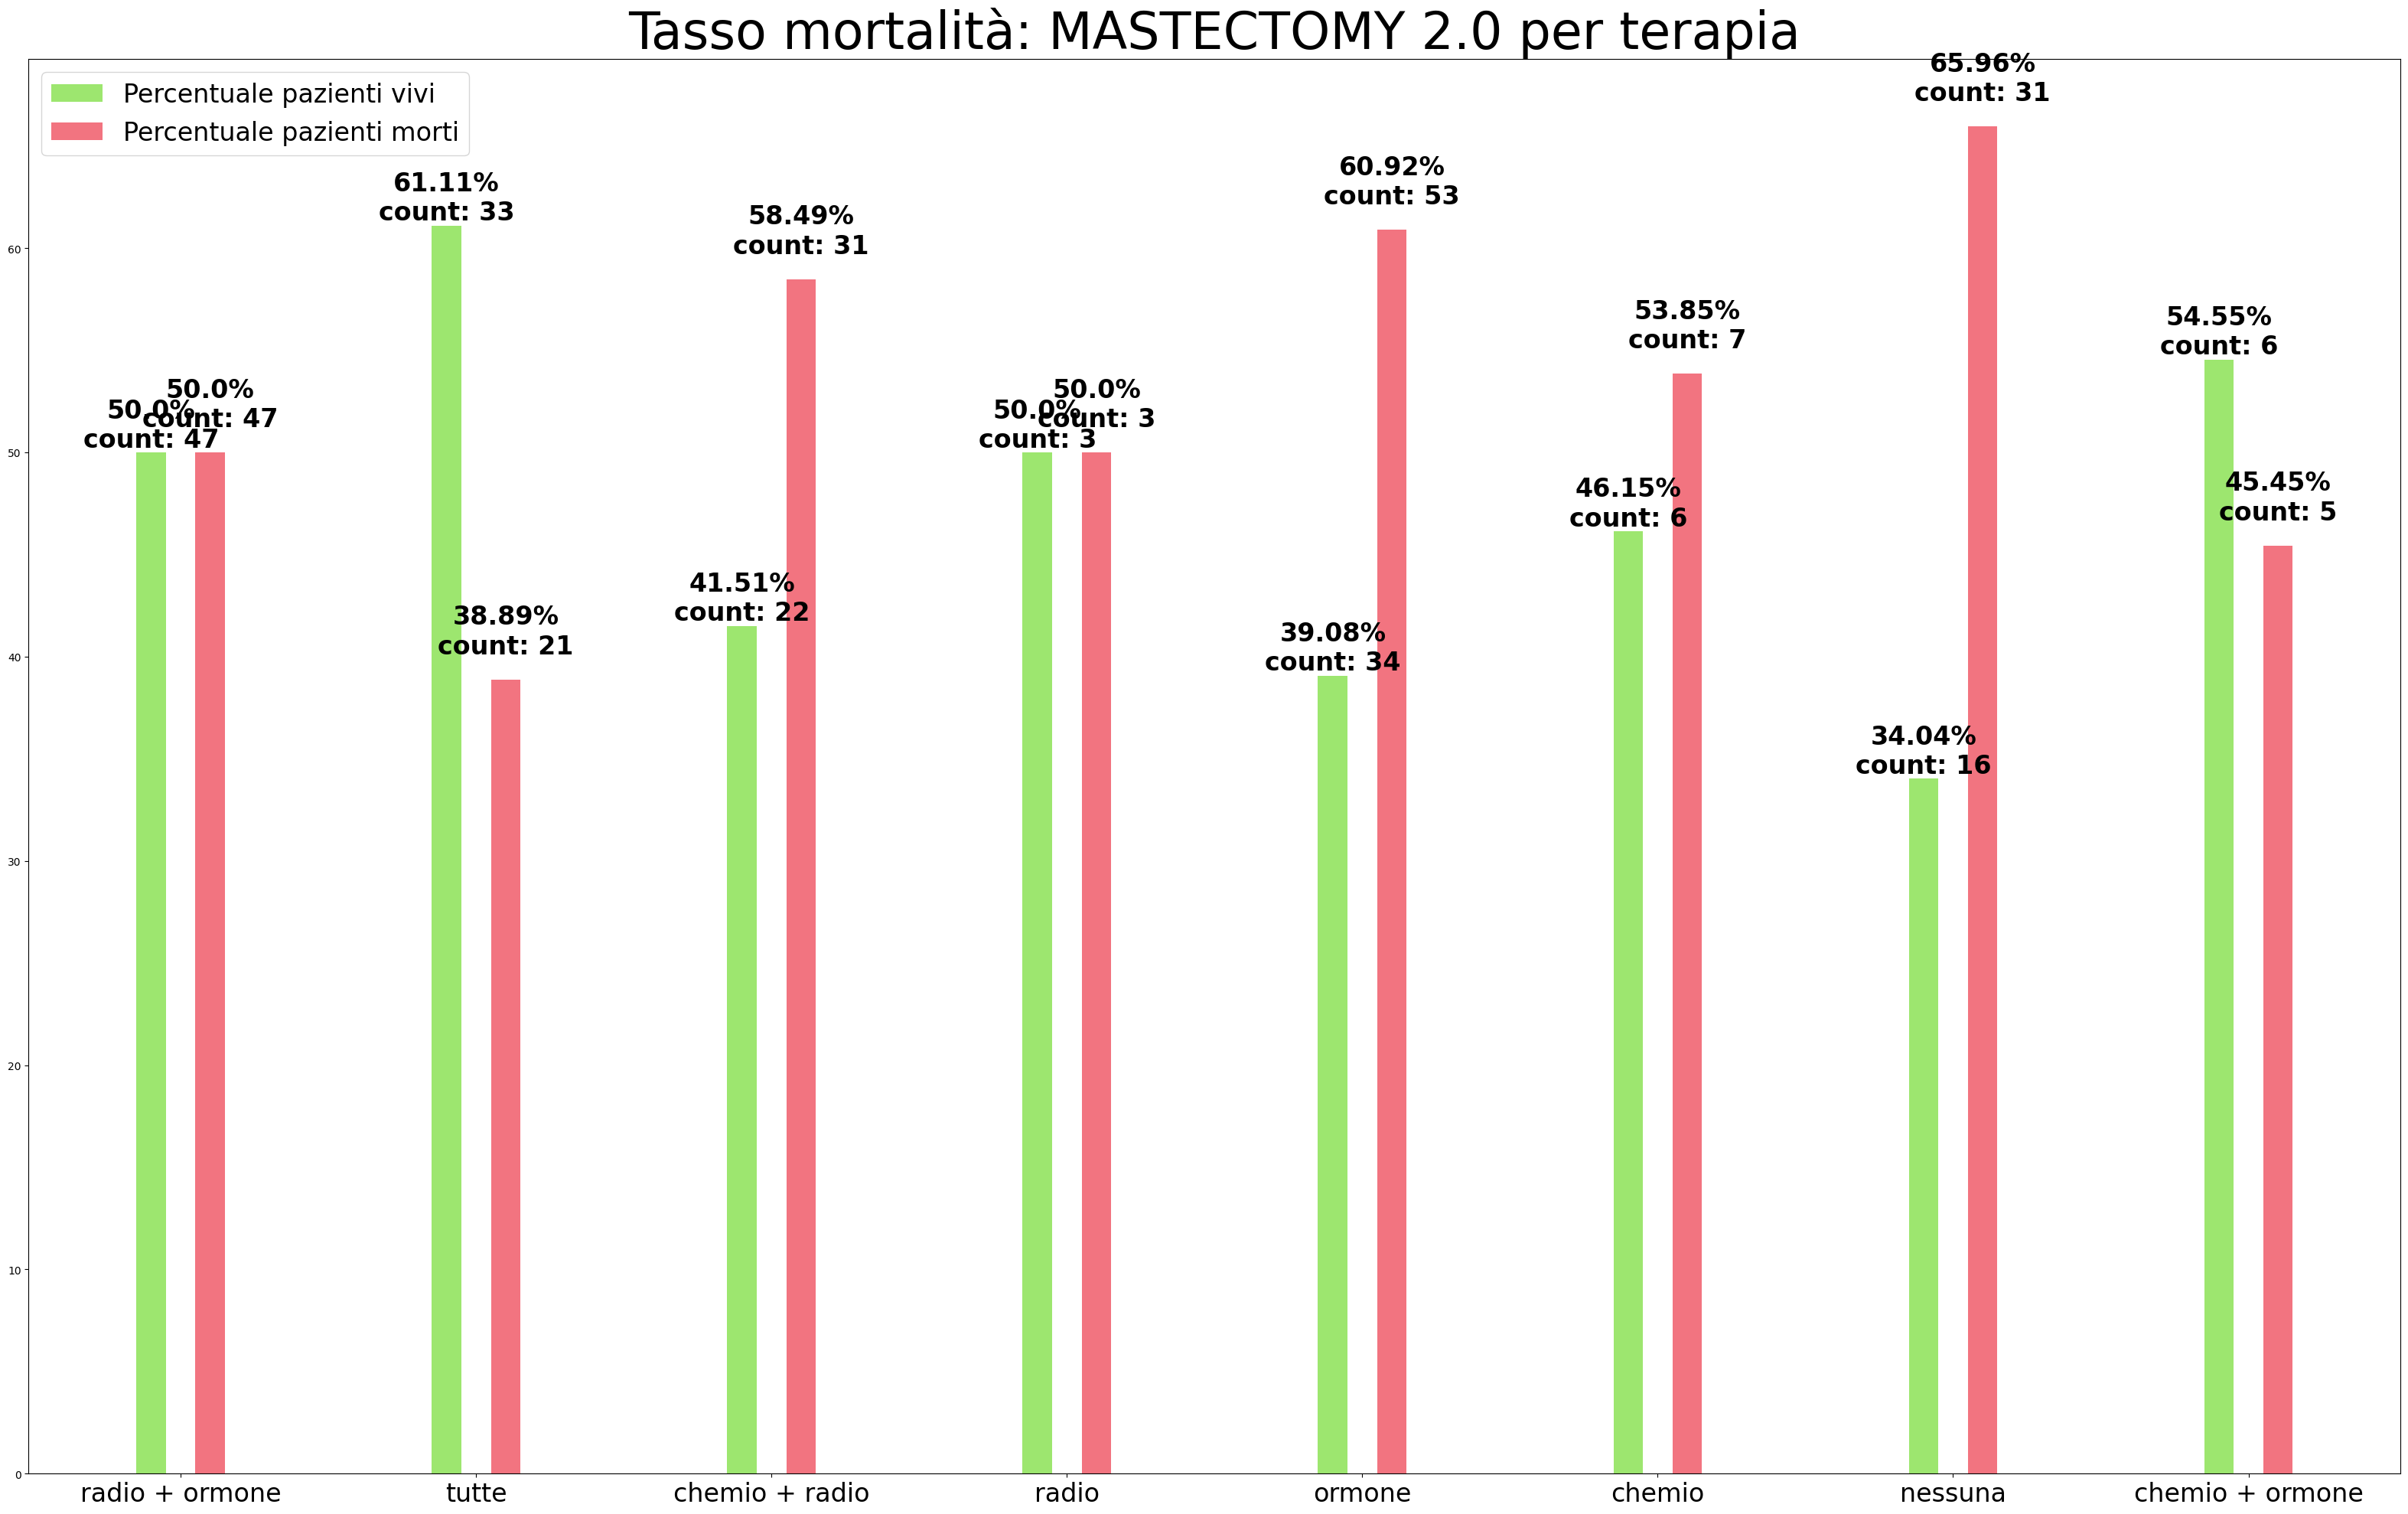

In [12]:
risultati = []

dataset = lista_terapie[4]
data = []
n = []
m = []

for terapia in dataset['Terapie'].unique():
    df_terapia = dataset[dataset['Terapie'] == terapia]
    
    value_counts = df_terapia['death_from_cancer'].value_counts()

    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    
    totale = value_counts.sum()
    
    percentuale = ((value_counts / totale) * 100).round(2)
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)

    # Mi servirà dopo per calcolarmi con che probabilità si verifica un evento
    conteggio = (conto_n + conto_m)

    # Inserisco anche 'dataset['Operation_Stage'].iloc[0]' per facilitarmi dopo il multi index in quanto andrò a fare le percentuali assolute
    risultati.append((dataset['Operation_Stage'].iloc[0], terapia, tupla, conteggio))

    data.append({'Terapia': terapia, 'Percentuale(v/m)': tupla})
    n.append(conto_n)
    m.append(conto_m)

grafico = pd.DataFrame(data)
crea_grafico(grafico, f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]} per terapia', n, m)

<center><b>Che combinazione di cure mi permette di sconfiggere il cancro il più velocemente possibile?</b></center>

<span style="color:red"><b>ATTENZIONE!</b></span></br>
Non è una linea guida, ma quello che <b>sembra</b> più conveniente fare.

Prendendo in considerazione solo i dati delle persone vive questi sono i valori.

In [13]:
df_living = df_nuovo[df_nuovo['death_from_cancer'] == 'Living']
df_living

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
1,76.06,198.30,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
3,61.78,163.73,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
4,55.53,190.17,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
6,49.02,146.77,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
7,70.98,142.43,Living,9.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 1.0
...,...,...,...,...,...,...,...
1041,61.99,133.73,Living,35.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 3.0
1042,31.71,195.93,Living,99.0,"(1, 1, 1)",tutte,MASTECTOMY 3.0
1047,48.67,176.60,Living,50.0,"(1, 1, 1)",tutte,MASTECTOMY 3.0
1052,48.53,109.00,Living,27.0,"(1, 0, 1)",chemio + radio,MASTECTOMY 3.0


In [14]:
generale = []

for operazione in df_living['Operation_Stage'].unique():
    for cura in df_living['Terapie'].unique():
        df_periodo = df_living[(df_living['Operation_Stage'] == operazione) & (df_living['Terapie'] == cura)]

        if df_periodo.empty:
            continue
        
        media = (df_periodo['overall_survival_months'].mean()).round(2)
        minimo = df_periodo['overall_survival_months'].min()
        massimo = df_periodo['overall_survival_months'].max()
        mediana = (df_periodo['overall_survival_months'].median()).round(2)
        
    
        generale.append({
            'Operation_Stage': operazione,
            'Cura': cura,
            'Media': media,
            'Minimo': minimo,
            'Massimo': massimo,
            'Mediana': mediana
        })
    
        df_mesi_vita = pd.DataFrame(generale)

df_mesi_vita = df_mesi_vita[~(df_mesi_vita[['Media', 'Minimo', 'Massimo', 'Mediana']].nunique(axis=1) == 1)]
display(df_mesi_vita)

,Operation_Stage,Cura,Media,Minimo,Massimo,Mediana
0,BREAST CONSERVING 1.0,radio,205.10,34.10,307.63,204.44
1,BREAST CONSERVING 1.0,radio + ormone,146.28,23.80,274.03,143.53
2,BREAST CONSERVING 1.0,ormone,155.87,88.20,217.77,151.44
3,BREAST CONSERVING 1.0,chemio + radio,88.87,75.40,114.47,76.73
4,BREAST CONSERVING 1.0,nessuna,191.66,99.23,265.93,212.30
6,BREAST CONSERVING 2.0,radio,196.32,76.63,297.23,189.87
7,BREAST CONSERVING 2.0,radio + ormone,151.40,2.00,318.20,145.63
8,BREAST CONSERVING 2.0,ormone,73.96,1.27,184.77,17.83
9,BREAST CONSERVING 2.0,chemio + radio,168.18,60.67,322.83,165.25
11,BREAST CONSERVING 2.0,tutte,130.52,13.40,259.93,131.57


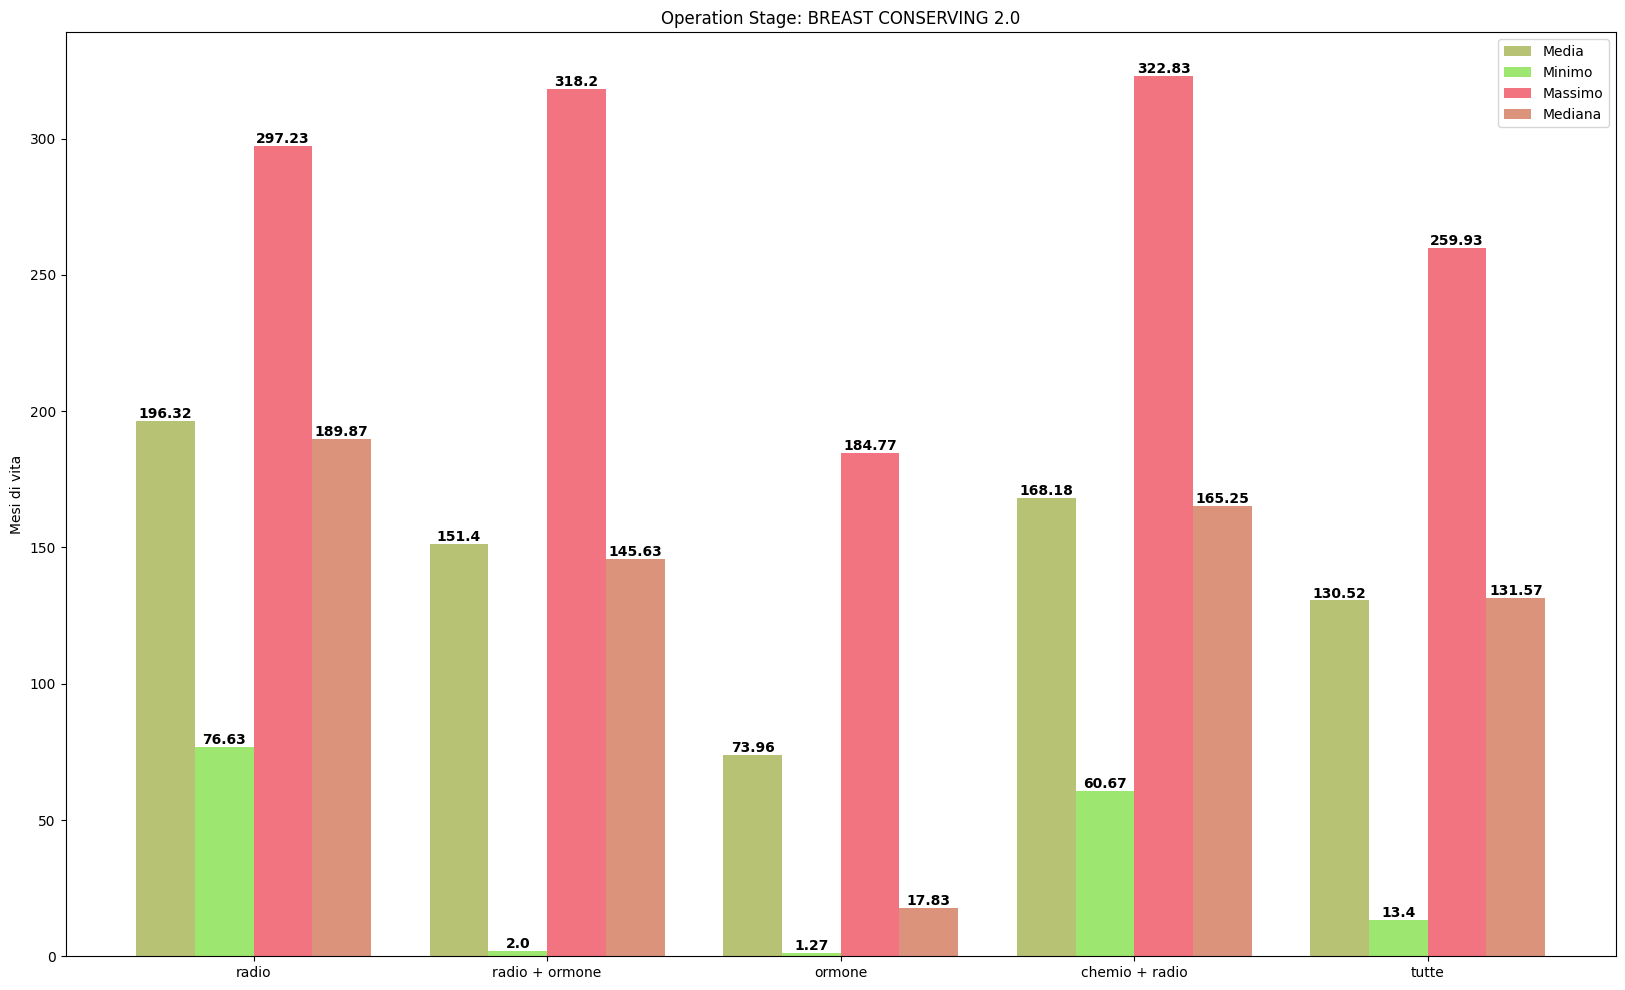

In [15]:
colori = ['#b8c275', '#9de66f', '#f27480', '#db937c']
nomi_barra = ['Media', 'Minimo', 'Massimo', 'Mediana']

df_finale = df_mesi_vita[(df_mesi_vita['Operation_Stage'] == 'BREAST CONSERVING 2.0')]

indice = np.arange(len(df_finale['Cura'].unique()))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 12))

for i, col in enumerate (nomi_barra):
    barre = ax.bar(indice + i*width, df_finale[col], width, label=nomi_barra[i], color=colori[i])

    for barra in barre:
            yval = barra.get_height()
            ax.text(
                barra.get_x() + barra.get_width()/2,
                yval,       
                f'{yval}',           
                ha='center',              
                va='bottom',
                fontweight='bold'
            )

ax.set_ylabel('Mesi di vita')
ax.set_title(f'Operation Stage: BREAST CONSERVING 2.0')
ax.set_xticks(indice + width * 1.5)
ax.set_xticklabels(df_finale['Cura'].unique())
ax.legend()

plt.show()

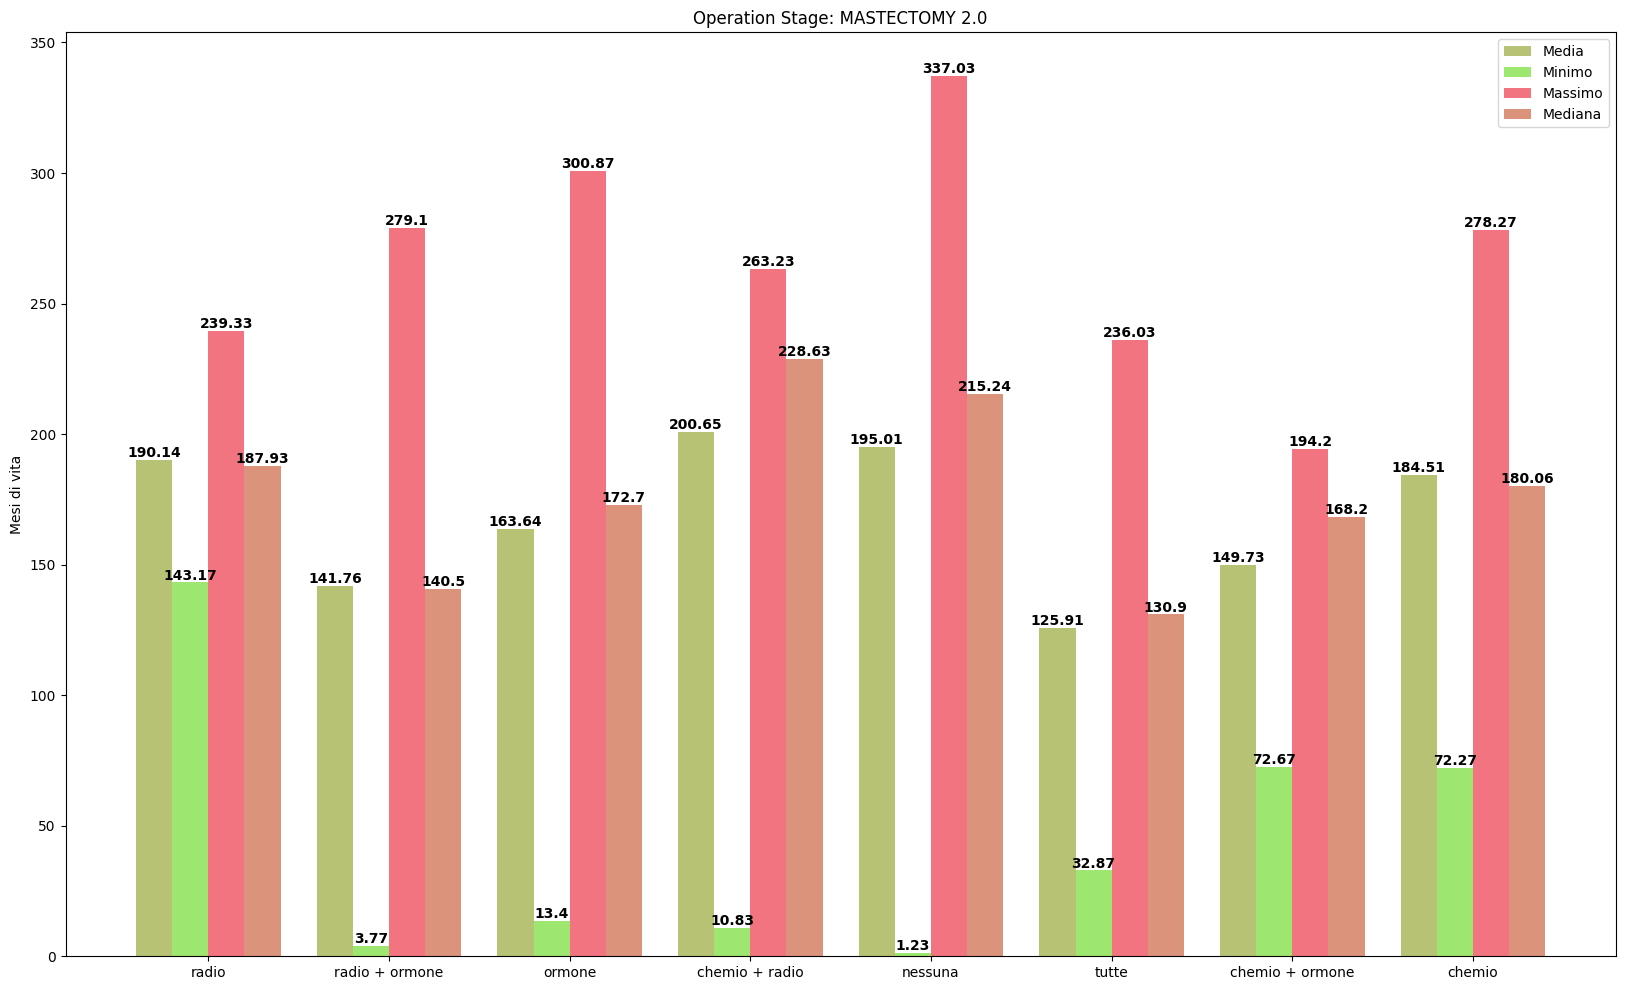

In [16]:
colori = ['#b8c275', '#9de66f', '#f27480', '#db937c']
nomi_barra = ['Media', 'Minimo', 'Massimo', 'Mediana']

df_finale = df_mesi_vita[(df_mesi_vita['Operation_Stage'] == 'MASTECTOMY 2.0')]

indice = np.arange(len(df_finale['Cura'].unique()))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 12))

for i, col in enumerate (nomi_barra):
    barre = ax.bar(indice + i*width, df_finale[col], width, label=nomi_barra[i], color=colori[i])

    for barra in barre:
            yval = barra.get_height()
            ax.text(
                barra.get_x() + barra.get_width()/2,
                yval,       
                f'{yval}',           
                ha='center',              
                va='bottom',
                fontweight='bold'
            )

ax.set_ylabel('Mesi di vita')
ax.set_title(f'Operation Stage: MASTECTOMY 2.0')
ax.set_xticks(indice + width * 1.5)
ax.set_xticklabels(df_finale['Cura'].unique())
ax.legend()

plt.show()

<center><b>Conclusioni</b></center>

<b>PREVENZIONE</b></br>
L'età non influisce, ma il diagnosticare preventivamente il cancro, sì.